# Info
Purpose:

    Build up the analysis of 5STARG MLO May 2022 data
    Based on musstar analysis
    Look at the field of views

Input:

    None

Output:

    Figures and analysis

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - write_utils
    - path_utils
    - scipy

Needed Files:
  - 5STARG_* RADIOMETERS.dat files

Modification History:

    Written: Samuel LeBlanc, MLO, 2022-05-08
    Modified:


# Notes

## MLO day 2 (2022-05-08) FOV analysis

From Steve:

notes from MLO 2022  

5/8/2022    
Initial problems with elev motor stalling. Some gearbox PT and dangling the chiller tubes off the back fixed it.  

Initial problems with v0.5 software tracking: PID's were flatlined. Ran 0.4 software, then back to 0.5 and now it works.  

Got some early morning suntracking around 04:40. Generally very cloudy this morning.  

cloudy tracking around 05:12  
  
elevation pid output seems to have steps every now and then. Is this play in the gearbox that causes this?   
keeping a finger on the head seems to help  
  
fov recipe at 05:34  
recipe was wrong... it was repeating the azi. then it got cloud  

tweaked the recipe to do elevation fov. steps seem a bit big  

new elevation revipe withh smaller steps.  
started 06:19  
finished 06:26  
  
finger darks:  
vis low to high wavelengths  
starting 06:28 finishing 06:29, around 10 seconds each  

messed up the tracking... had to restart  
  
came down from sky-viewing at zenith, to track sun by hand  
  
nir following the barrels of vis (low to high)  
starting 06:33 finished 0.34  
  
modified the recipe for az and el fov  
started around 07:00 - 07:01  
  
restarted suntracking at 07:10  

# Prepare python environment

In [34]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from datetime import datetime


In [2]:
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower 

In [10]:
name = 'MLO_May2022'
vv = 'v1'
fp = getpath(name)


('Return path named: ', 'MLO_May2022', u'/mnt/c/Users/lebla/Research/MLO/2022_May/')


In [14]:
import muSSTAR_utils as u
import sys
if sys.version_info[0]>2:
    python3 = True
    import importlib
    importlib.reload(u)
else:
    python3 = False
    reload(u)

# Load and plot measurements

## MLO Day 2: 2022-05-08

In [21]:
s = u.reader_RADIOMETER(fp+'5STARG_20220508_MLO_day2/5STARG_20220508_183120_RADIOMETERS_headermodded.dat',islabjack=True)

(20880, 20880)


In [22]:
s.keys()

Index([u'YYYY', u'MM', u'DD', u'hh:mm:ss', u'tr', u'el_setpoint',
       u'azi_setpoint', u'el_pid_out', u'azi_pid_out', u'CH1_0', u'CH1_2',
       u'CH1_4', u'CH2_0', u'CH2_2', u'CH2_4', u'CH3_0', u'CH3_2', u'CH3_4',
       u'CH4_0', u'CH4_2', u'CH4_4', u'CH5_0', u'CH5_2', u'CH5_4', u'here',
       u'CH6_0', u'CH6_2', u'CH6_4', u'CH7_0', u'CH7_2', u'CH7_4', u'CH8_0',
       u'CH8_2', u'CH8_4', u'CH9_0', u'CH9_2', u'CH9_4', u'spare',
       u'5vref_temp', u'12pos_0_33', u'12neg_0_33', u'UTC', u'sza', u'azi',
       u'sf', u'dec', u'ref5v', u'ref12v_pos', u'ref12v_neg', u'5vtef_tempC',
       u'V1_0', u'V1_2', u'V1_4', u'V2_0', u'V2_2', u'V2_4', u'V3_0', u'V3_2',
       u'V3_4', u'V4_0', u'V4_2', u'V4_4', u'V5_0', u'V5_2', u'V5_4', u'V6_0',
       u'V6_2', u'V6_4', u'V7_0', u'V7_2', u'V7_4', u'V8_0', u'V8_2', u'V8_4',
       u'V9_0', u'V9_2', u'V9_4'],
      dtype='object')

In [85]:
u.define_long_names(s)

In [25]:
s.label = 'MLO_May2022_FOV'

### Plots

In [84]:
u.clean_up_and_prep_for_plots(s,fp+'plots/')

/home/samuel/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


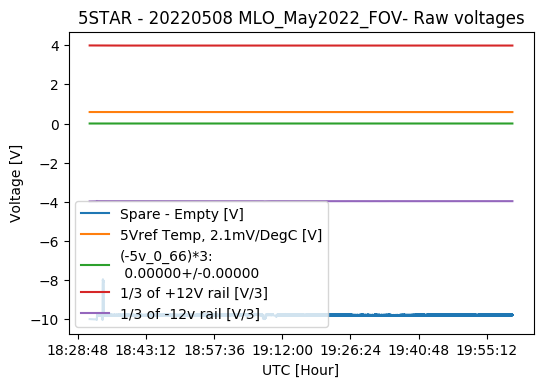

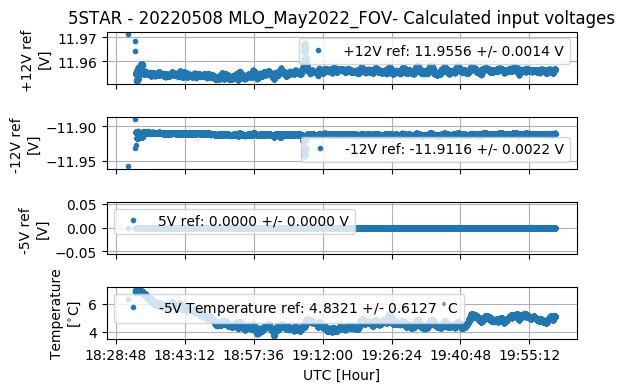

In [27]:
u.plt_hskp(s,fp+'plots/')

In [75]:
    islabjack = True
    V = np.zeros((9,3,len(s['ref5v'])))+np.nan
    for k in list(s.keys()):
        if k.startswith('CH') and k[-1].isdigit():
            if islabjack:
                s[k.replace('CH','V')] = -s[k]
            else:
                s[k.replace('CH','V')] = -s[k]-s['ref5v']
            # make array for easier use. channel, gain stage, then measurements
            icht,istaget = [int(i) for i in k.replace('CH','').split('_')]
            V[icht-1,int(istaget/2),:] = s[k.replace('CH','V')]

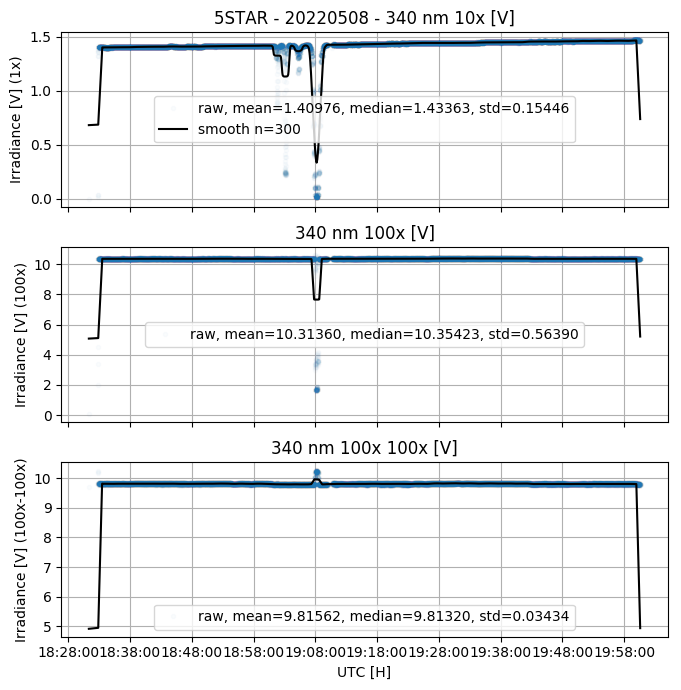

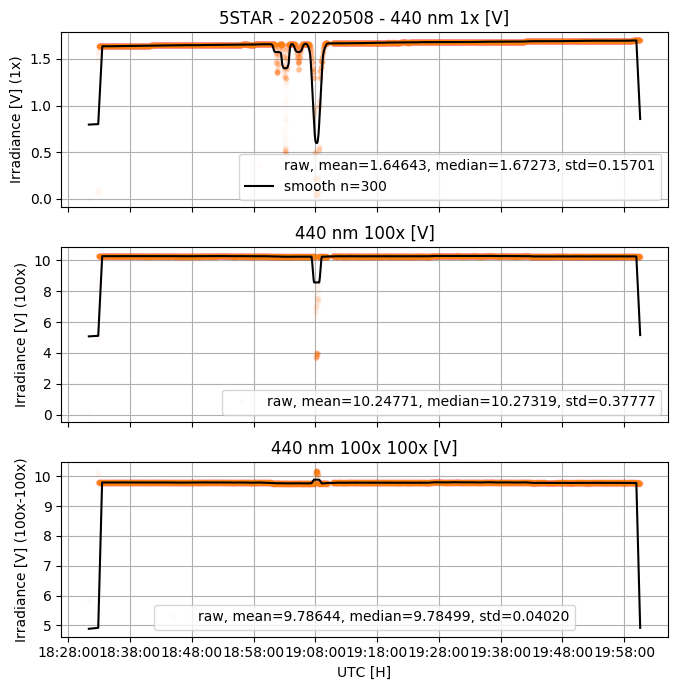

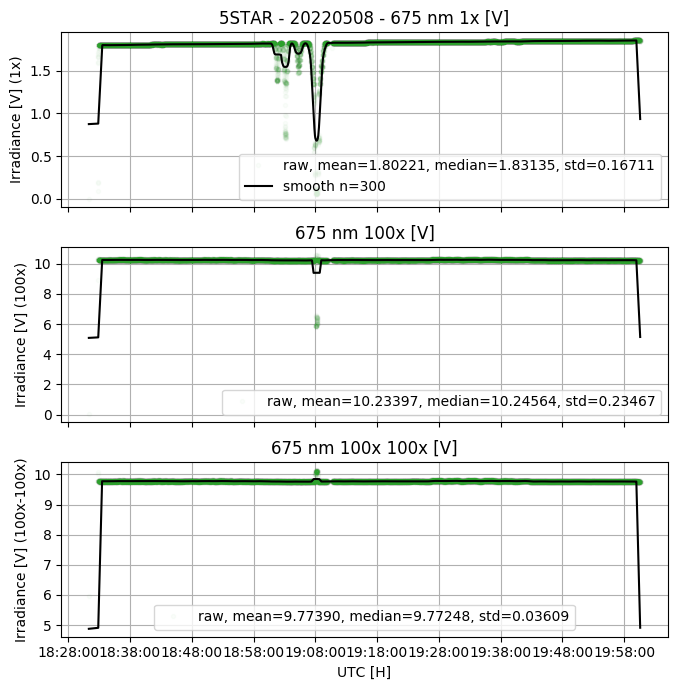

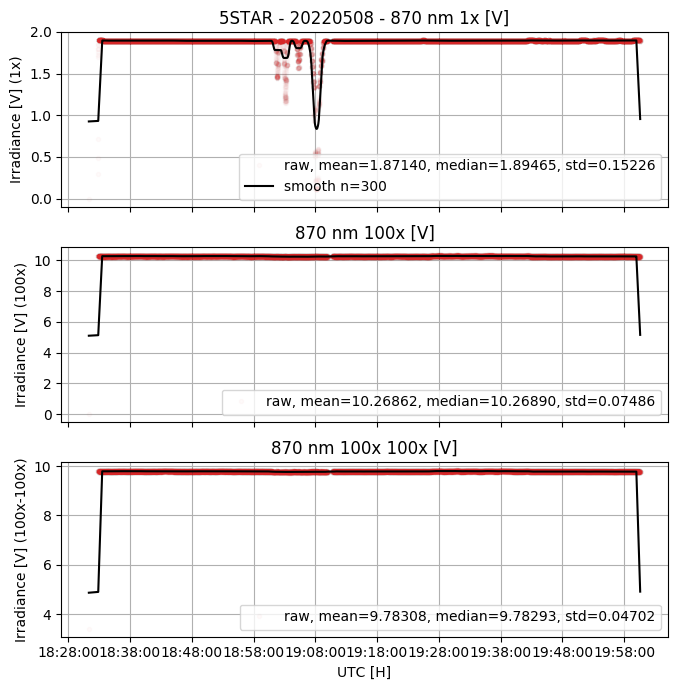

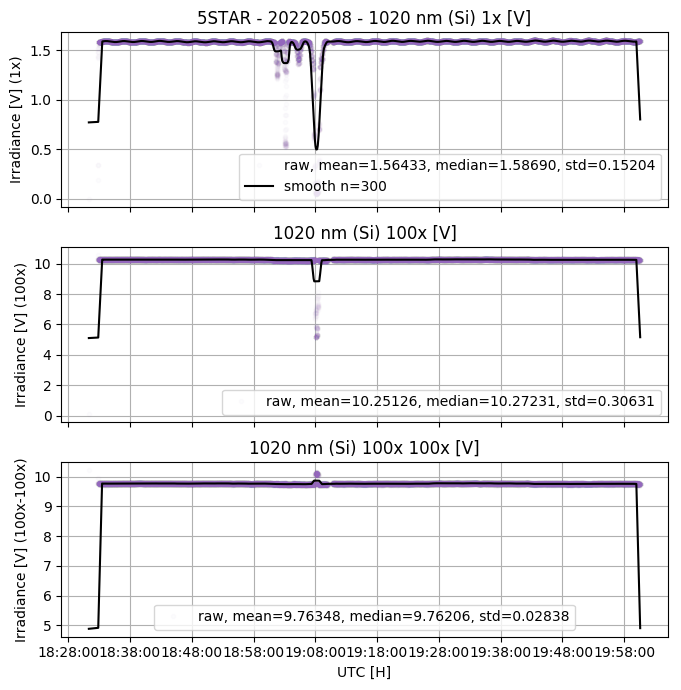

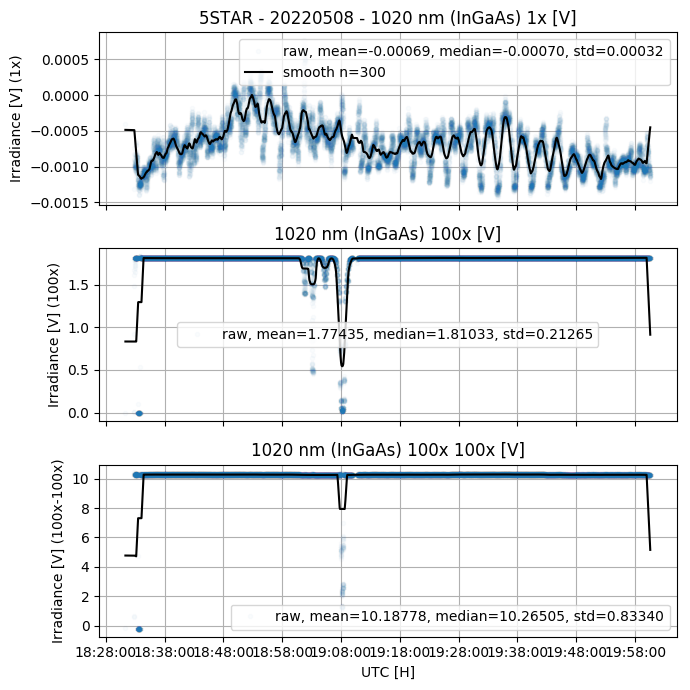

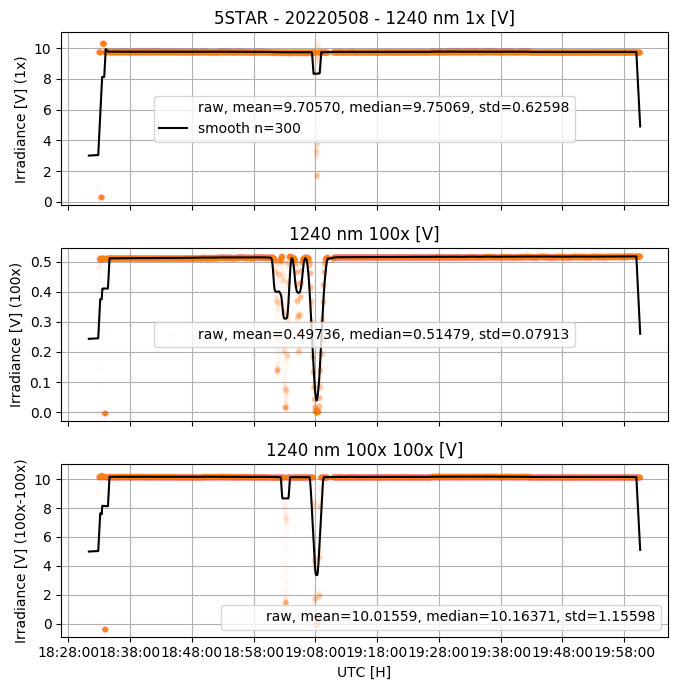

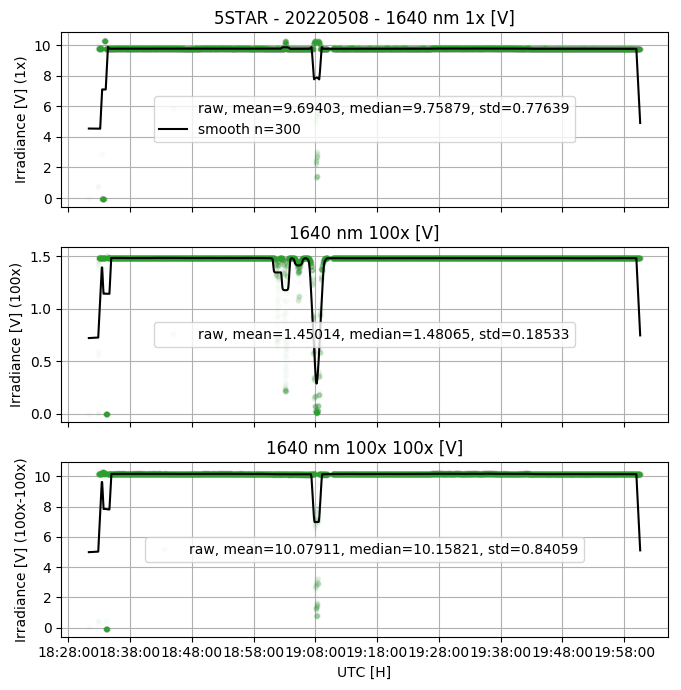

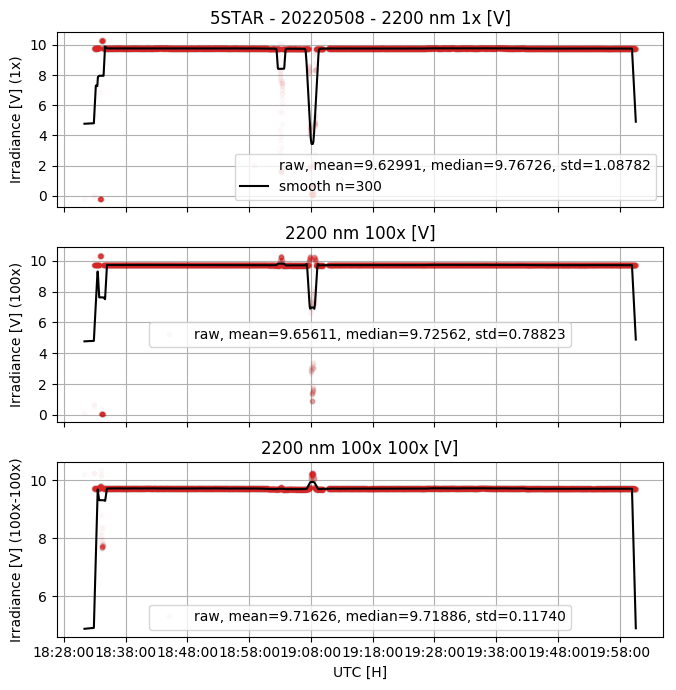

In [29]:
u.plot_channels(s,fp+'plots/{s.daystr}_{s.label}/'.format(s=s),dpi=200)

In [77]:
u.plot_v(s,fp+'plots/{s.daystr}_{s.label}/'.format(s=s))

<IPython.core.display.Javascript object>

TypeError: list indices must be integers, not unicode

In [30]:
s.keys()

Index([u'YYYY', u'MM', u'DD', u'hh:mm:ss', u'tr', u'el_setpoint',
       u'azi_setpoint', u'el_pid_out', u'azi_pid_out', u'CH1_0', u'CH1_2',
       u'CH1_4', u'CH2_0', u'CH2_2', u'CH2_4', u'CH3_0', u'CH3_2', u'CH3_4',
       u'CH4_0', u'CH4_2', u'CH4_4', u'CH5_0', u'CH5_2', u'CH5_4', u'here',
       u'CH6_0', u'CH6_2', u'CH6_4', u'CH7_0', u'CH7_2', u'CH7_4', u'CH8_0',
       u'CH8_2', u'CH8_4', u'CH9_0', u'CH9_2', u'CH9_4', u'spare',
       u'5vref_temp', u'12pos_0_33', u'12neg_0_33', u'UTC', u'sza', u'azi',
       u'sf', u'dec', u'ref5v', u'ref12v_pos', u'ref12v_neg', u'5vtef_tempC',
       u'V1_0', u'V1_2', u'V1_4', u'V2_0', u'V2_2', u'V2_4', u'V3_0', u'V3_2',
       u'V3_4', u'V4_0', u'V4_2', u'V4_4', u'V5_0', u'V5_2', u'V5_4', u'V6_0',
       u'V6_2', u'V6_4', u'V7_0', u'V7_2', u'V7_4', u'V8_0', u'V8_2', u'V8_4',
       u'V9_0', u'V9_2', u'V9_4'],
      dtype='object')

In [55]:
# Subset for the FOV times
dt_fov = [datetime(2022,5,8,19,1,0),datetime(2022,5,8,19,10,45)]
ifov = (s['UTC']>dt_fov[0]) & (s['UTC']<dt_fov[1])

<IPython.core.display.Javascript object>


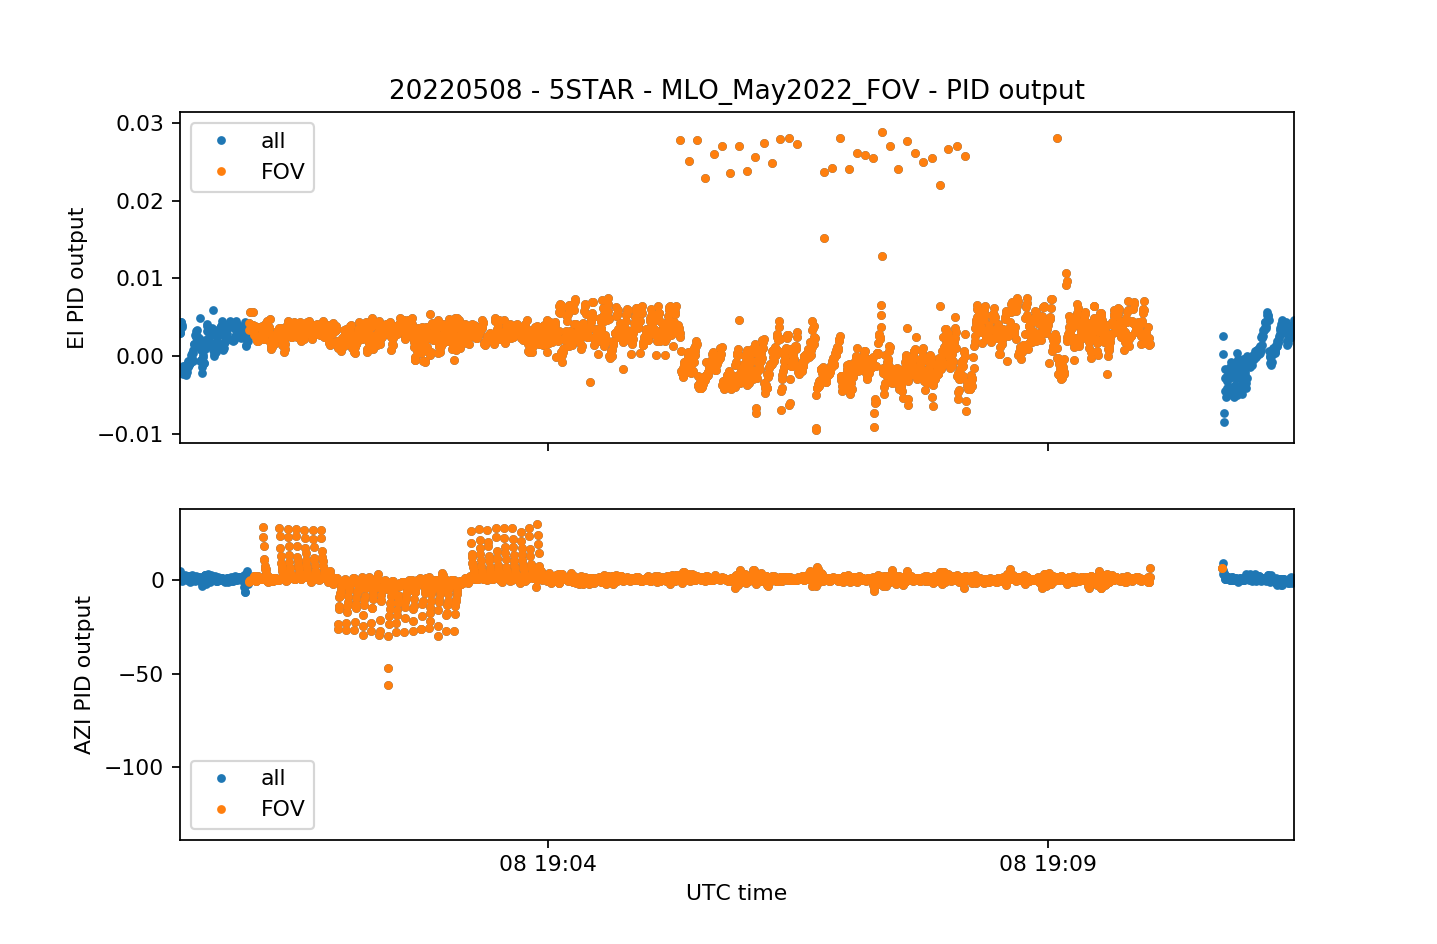

Text(0.5,1,'20220508 - 5STAR - MLO_May2022_FOV - PID output')

In [51]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(s['UTC'],s['el_pid_out'],'.',label='all')
ax[1].plot(s['UTC'],s['azi_pid_out'],'.',label='all')

ax[0].plot(s['UTC'][ifov],s['el_pid_out'][ifov],'.',label='FOV')
ax[1].plot(s['UTC'][ifov],s['azi_pid_out'][ifov],'.',label='FOV')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('El PID output')
ax[1].set_ylabel('AZI PID output')

ax[1].set_xlabel('UTC time')
ax[0].set_title('{s.daystr} - {s.instname} - {s.label} - PID output'.format(s=s))



<IPython.core.display.Javascript object>


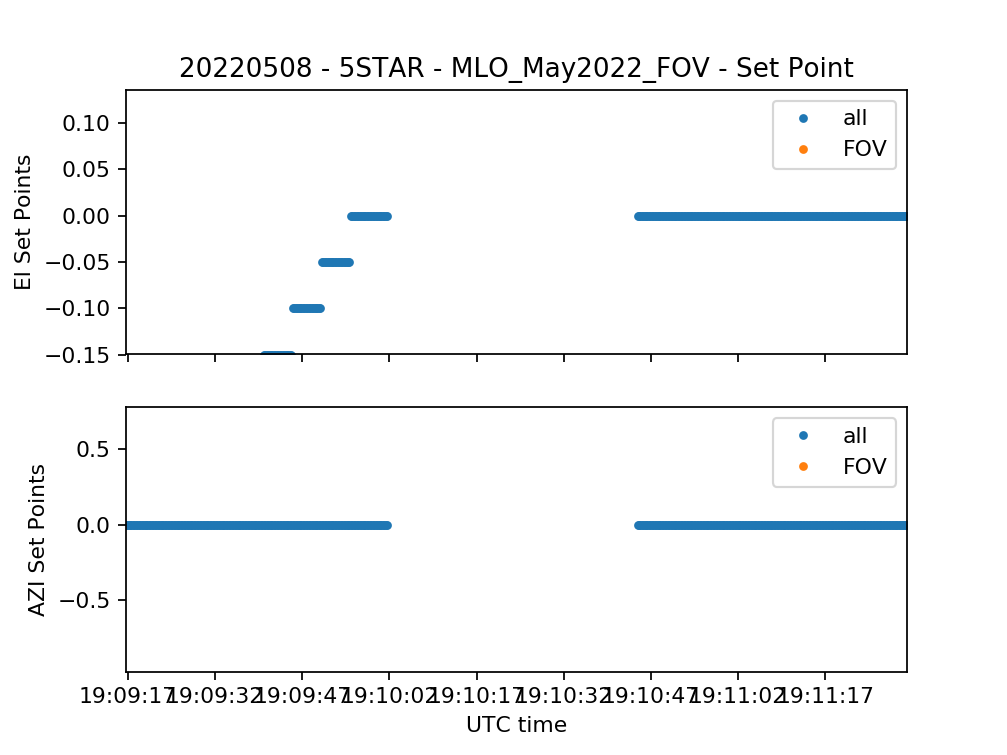

Text(0.5,1,'20220508 - 5STAR - MLO_May2022_FOV - Set Point')

In [49]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(s['UTC'],s['el_setpoint'],'.',label='all')
ax[1].plot(s['UTC'],s['azi_setpoint'],'.',label='all')

ax[0].plot(s['UTC'][ifov],s['el_setpoint'][ifov],'.',label='FOV')
ax[1].plot(s['UTC'][ifov],s['azi_setpoint'][ifov],'.',label='FOV')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('El Set Points')
ax[1].set_ylabel('AZI Set Points')

ax[1].set_xlabel('UTC time')
ax[0].set_title('{s.daystr} - {s.instname} - {s.label} - Set Point'.format(s=s))


<IPython.core.display.Javascript object>


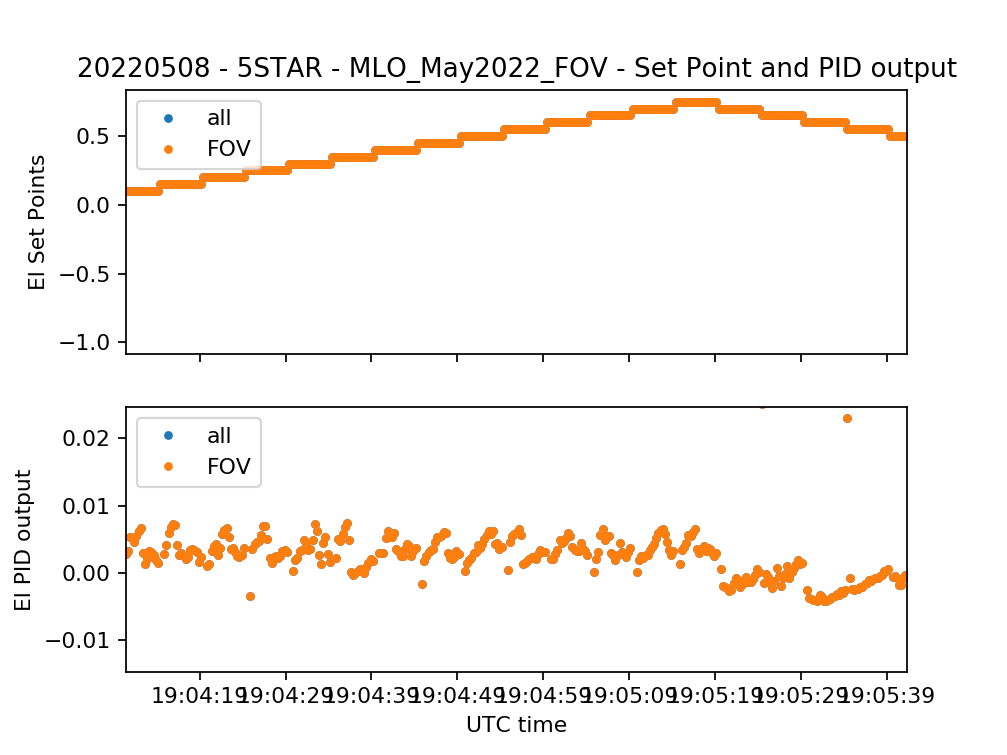

(738283.7923611111, 738283.7991319444)

In [56]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(s['UTC'],s['el_setpoint'],'.',label='all')
ax[1].plot(s['UTC'],s['el_pid_out'],'.',label='all')

ax[0].plot(s['UTC'][ifov],s['el_setpoint'][ifov],'.',label='FOV')
ax[1].plot(s['UTC'][ifov],s['el_pid_out'][ifov],'.',label='FOV')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('El Set Points')
ax[1].set_ylabel('El PID output')

ax[1].set_xlabel('UTC time')
ax[0].set_title('{s.daystr} - {s.instname} - {s.label} - Set Point and PID output'.format(s=s))

ax[0].set_xlim(dt_fov)

<IPython.core.display.Javascript object>


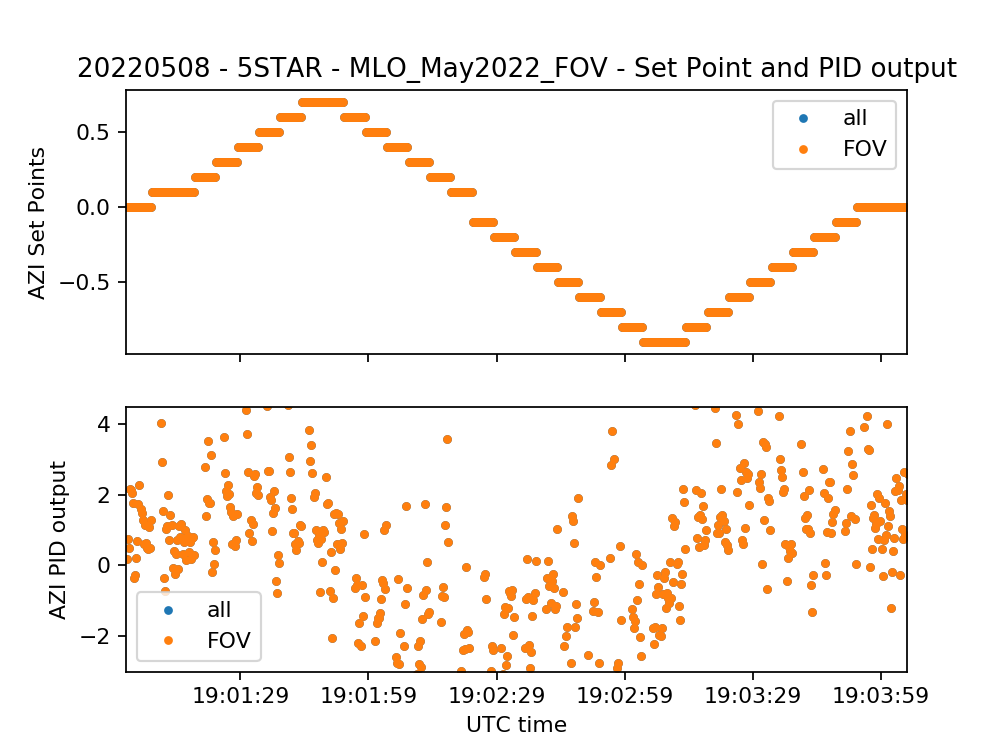

(738283.7923611111, 738283.7991319444)

In [57]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(s['UTC'],s['azi_setpoint'],'.',label='all')
ax[1].plot(s['UTC'],s['azi_pid_out'],'.',label='all')

ax[0].plot(s['UTC'][ifov],s['azi_setpoint'][ifov],'.',label='FOV')
ax[1].plot(s['UTC'][ifov],s['azi_pid_out'][ifov],'.',label='FOV')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('AZI Set Points')
ax[1].set_ylabel('AZI PID output')

ax[1].set_xlabel('UTC time')
ax[0].set_title('{s.daystr} - {s.instname} - {s.label} - Set Point and PID output'.format(s=s))

ax[0].set_xlim(dt_fov)

In [60]:
el_goodpid = 0.01
az_goodpid = 2.5

In [63]:
igood = (abs(s['el_pid_out']) < el_goodpid) & (abs(s['azi_pid_out']) < az_goodpid)

In [111]:
ifov_good = ifov & igood
ifov_good_az = ifov & igood & (s['azi_setpoint']!=0.0)
ifov_good_el = ifov & igood & (s['el_setpoint']!=0.0)


<IPython.core.display.Javascript object>


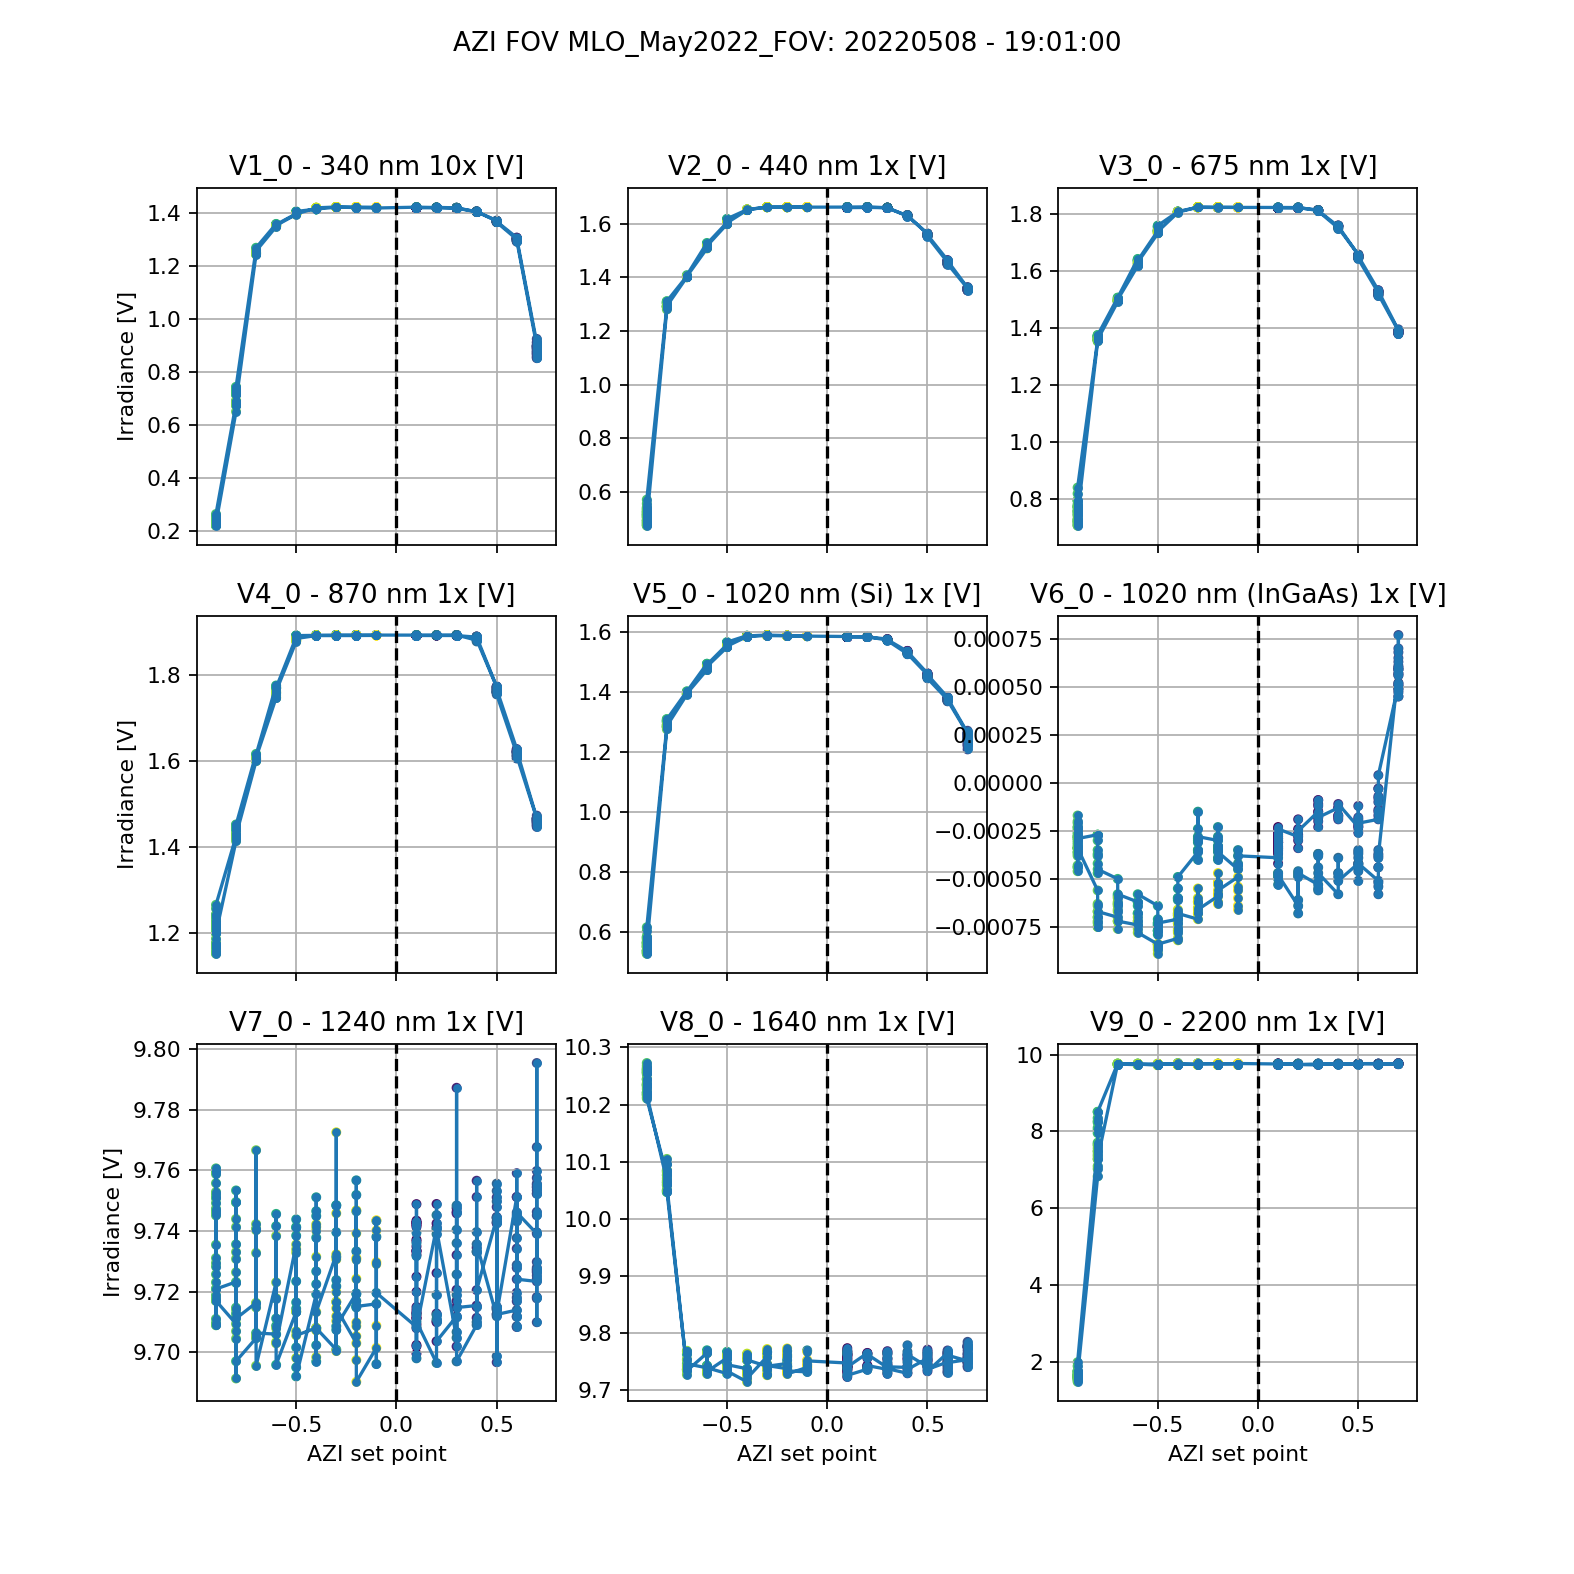

In [140]:
fig,ax = plt.subplots(3,3,sharex=True,figsize=(10,10))
ax = ax.flatten()
for ic,ch in enumerate(['V1_0','V2_0','V3_0','V4_0','V5_0','V6_0','V7_0','V8_0','V9_0']):
    ax[ic].plot(s['azi_setpoint'][ifov_good_az],s[ch][ifov_good_az],'.-',label=ch)
    ax[ic].scatter(s['azi_setpoint'][ifov_good_az],s[ch][ifov_good_az],50,s['UTC'][ifov_good_az],'.')
    ax[ic].axvline(0,ls='--',c='k')
    if ic>5: ax[ic].set_xlabel('AZI set point')
    if not ic%3: ax[ic].set_ylabel('Irradiance [V]')
    ax[ic].set_title('{} - {}'.format(ch,s[ch].name))
    ax[ic].grid()
fig.suptitle('AZI FOV {s.label}: {s.daystr} - {t[0]:%H:%M:%S}'.format(t=dt_fov,s=s))
fig.savefig(fp+'plots/{s.daystr}_{s.label}/{s.instname}_{s.daystr}_AZI_FOVT{t[0]:%H%M%S}.png'.format(s=s,t=dt_fov),
            dpi=600,transparent=True)

In [133]:
s[ch][ifov_good_az].max()

9.780619999999999

<IPython.core.display.Javascript object>


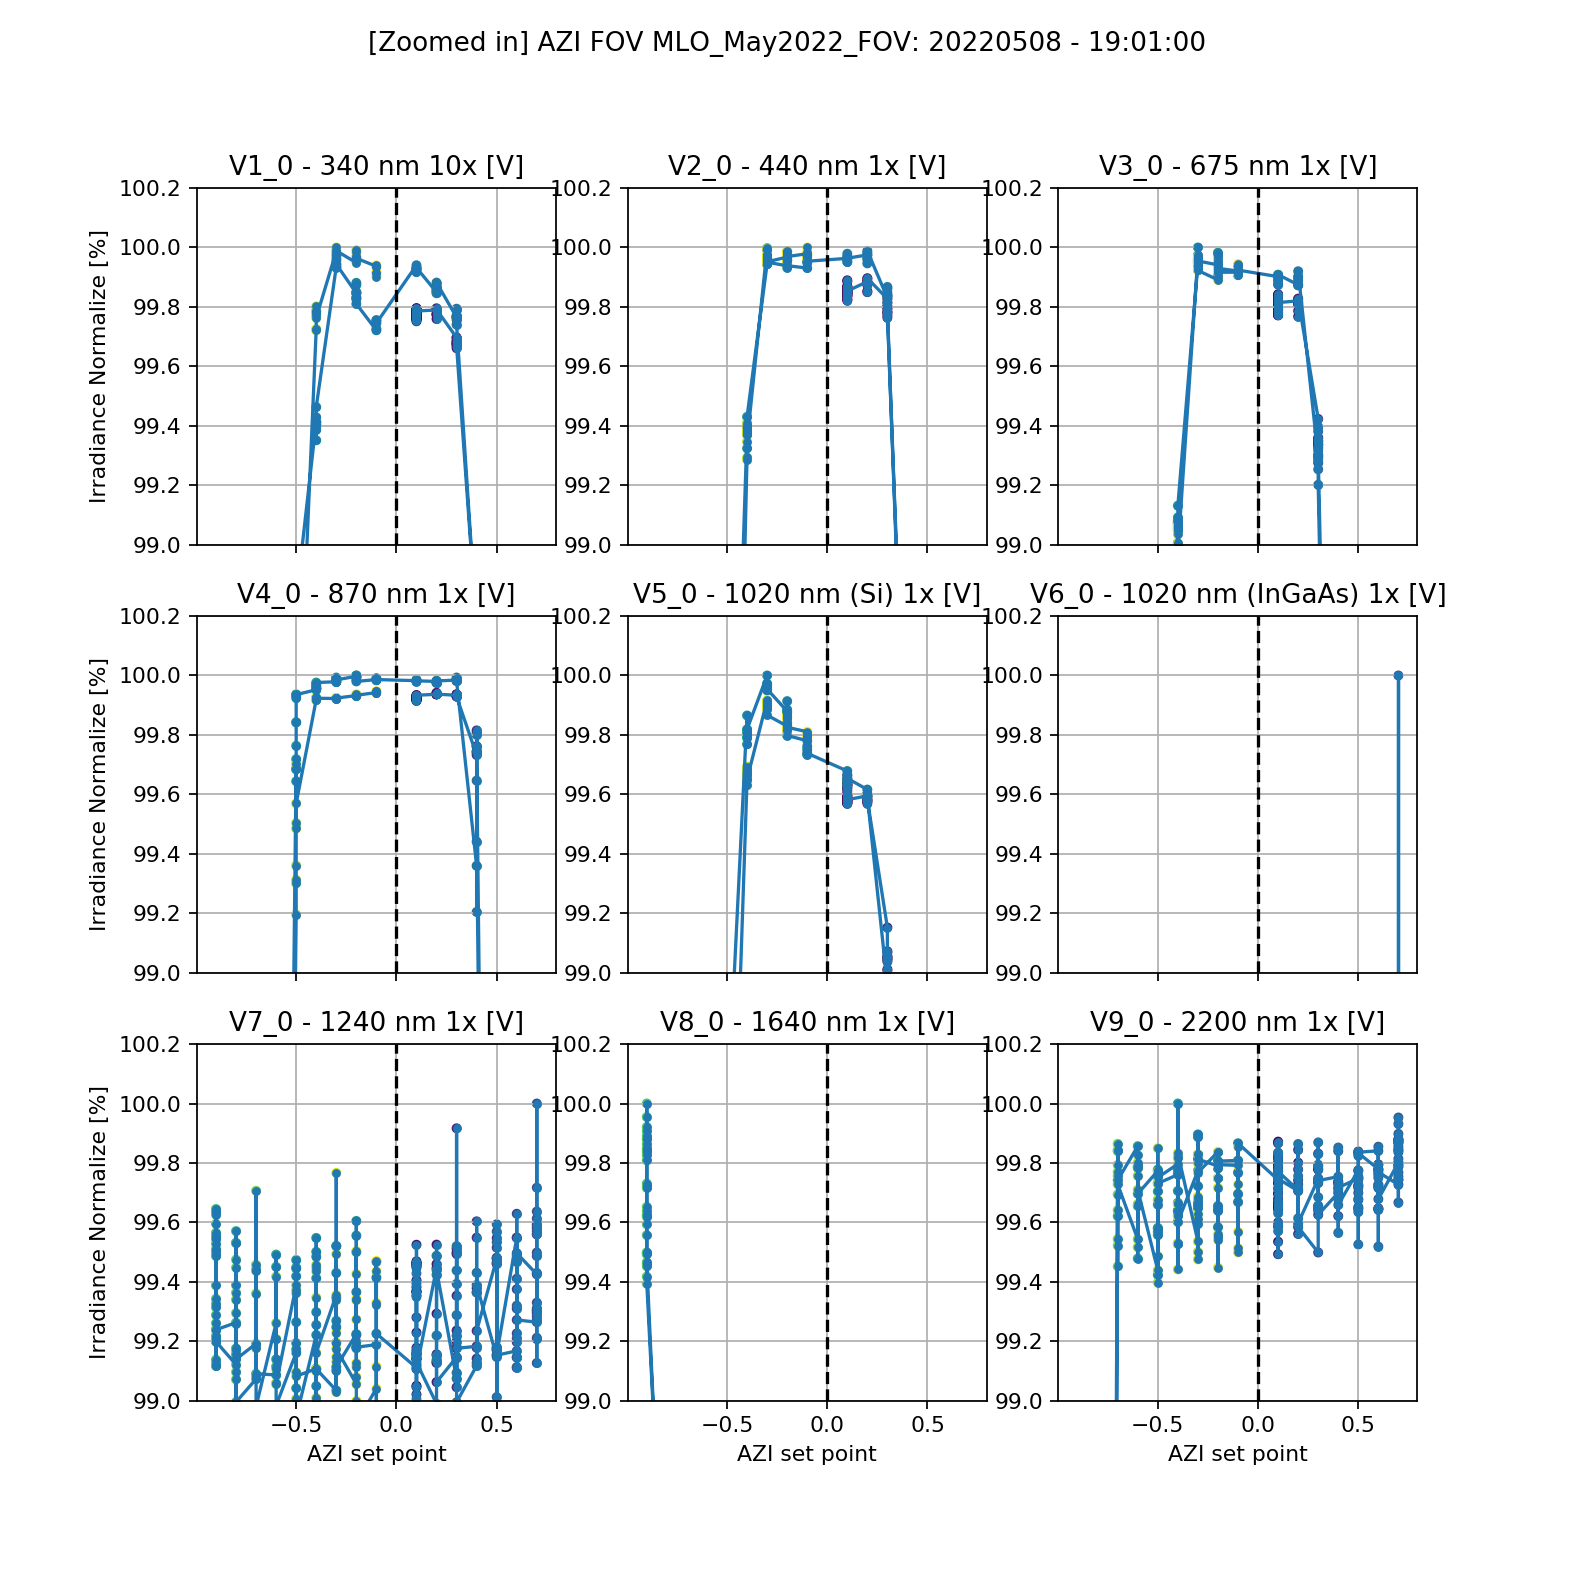

In [141]:
fig,ax = plt.subplots(3,3,sharex=True,figsize=(10,10))
ax = ax.flatten()
for ic,ch in enumerate(['V1_0','V2_0','V3_0','V4_0','V5_0','V6_0','V7_0','V8_0','V9_0']):
    ma = s[ch][ifov_good_az].max()
    ax[ic].plot(s['azi_setpoint'][ifov_good_az],s[ch][ifov_good_az]/ma*100.0,'.-',label=ch)
    ax[ic].scatter(s['azi_setpoint'][ifov_good_az],s[ch][ifov_good_az]/ma*100.0,50,s['UTC'][ifov_good_az],'.')
    ax[ic].axvline(0,ls='--',c='k')
    if ic>5: ax[ic].set_xlabel('AZI set point')
    if not ic%3: ax[ic].set_ylabel('Irradiance Normalize [%]')
    ax[ic].set_title('{} - {}'.format(ch,s[ch].name))
    ax[ic].grid()
    ax[ic].set_ylim([99,100.2])
fig.suptitle('[Zoomed in] AZI FOV {s.label}: {s.daystr} - {t[0]:%H:%M:%S}'.format(t=dt_fov,s=s))
fig.savefig(fp+'plots/{s.daystr}_{s.label}/{s.instname}_{s.daystr}_zoomed_AZI_FOVT{t[0]:%H%M%S}.png'.format(s=s,t=dt_fov),
            dpi=600,transparent=True)

<IPython.core.display.Javascript object>


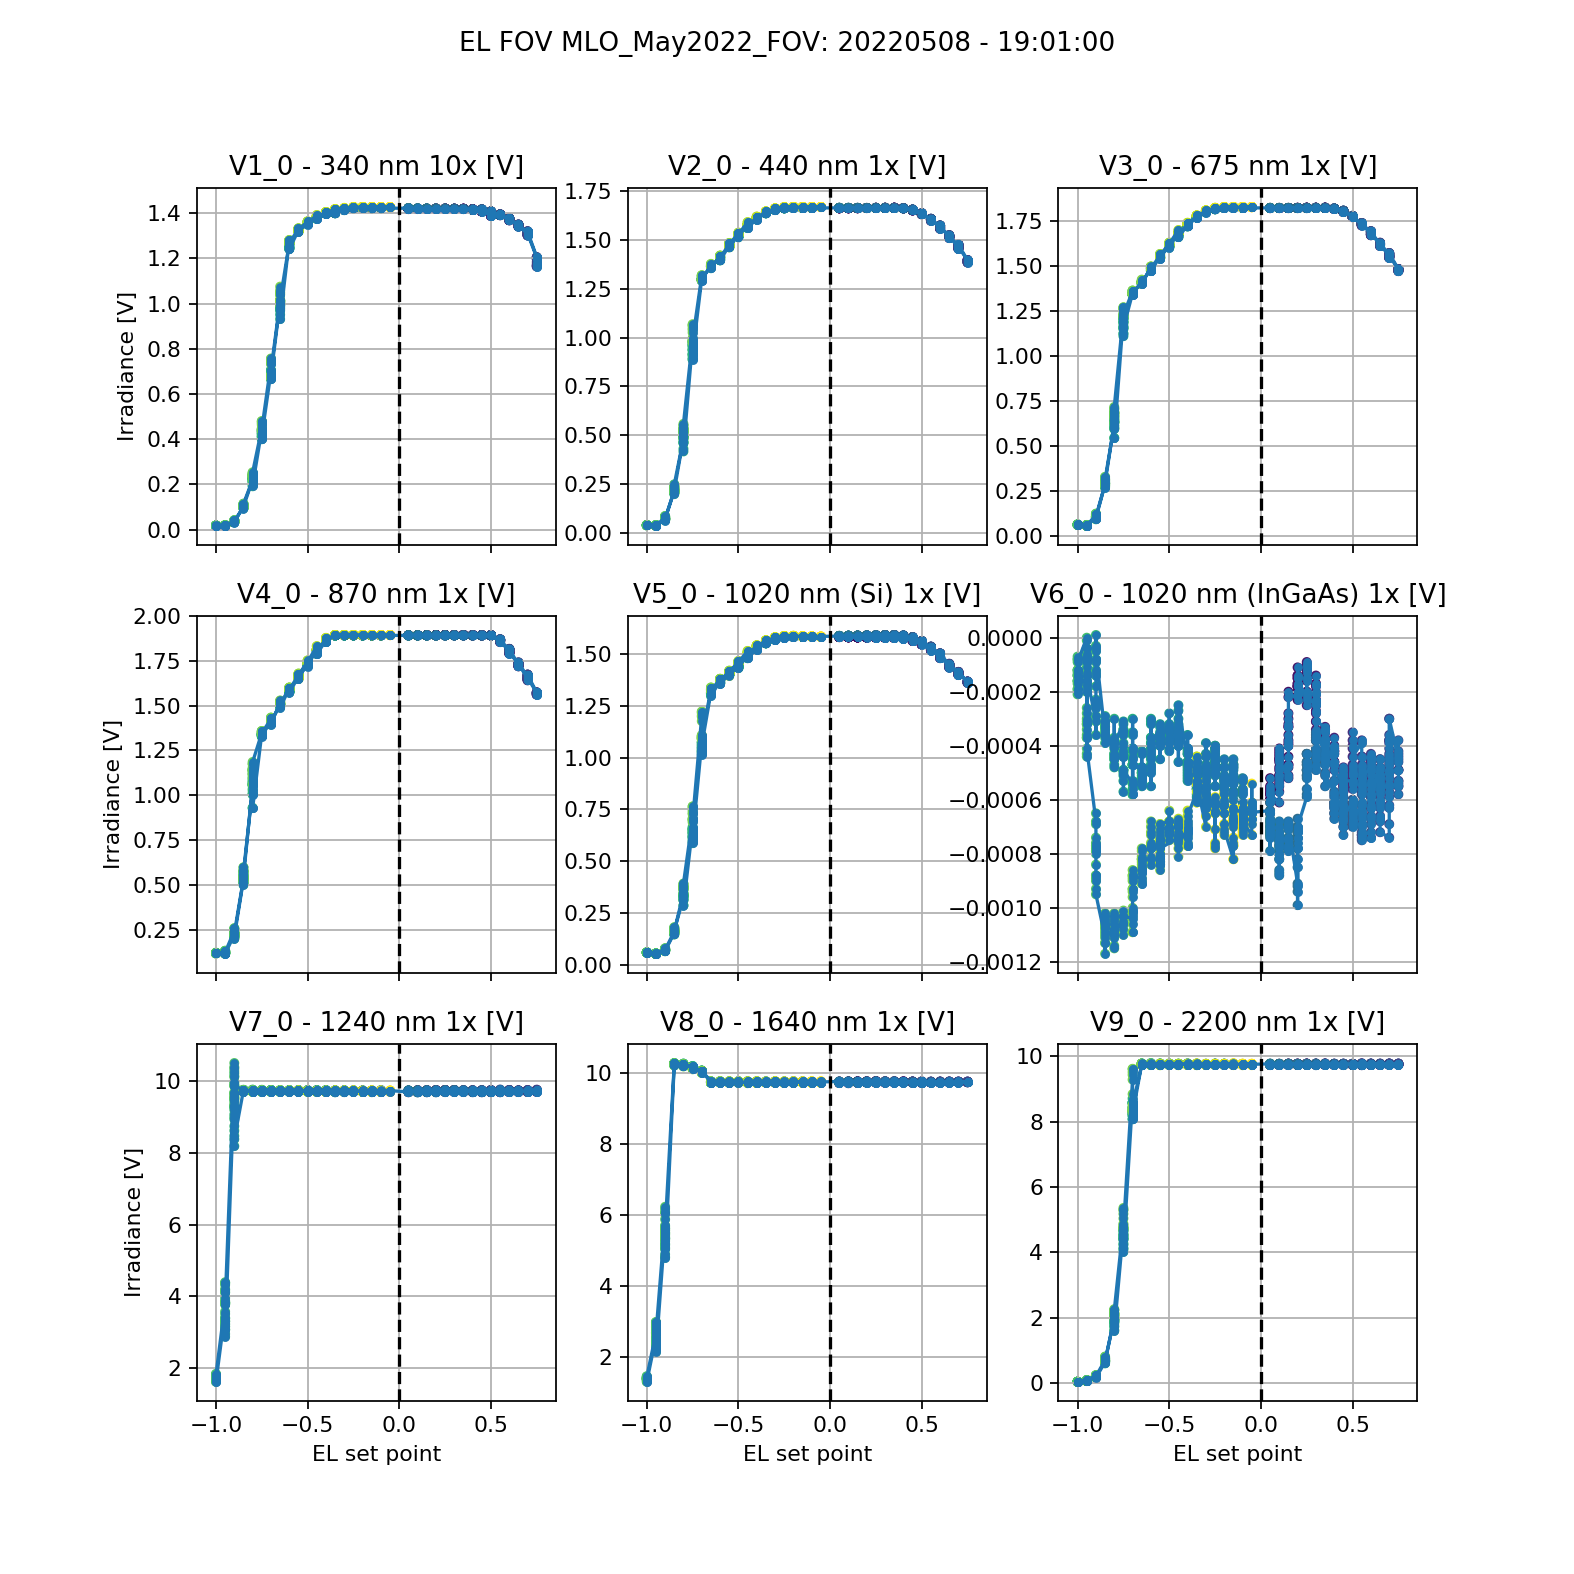

In [142]:
fig,ax = plt.subplots(3,3,sharex=True,figsize=(10,10))
ax = ax.flatten()
for ic,ch in enumerate(['V1_0','V2_0','V3_0','V4_0','V5_0','V6_0','V7_0','V8_0','V9_0']):
    ax[ic].plot(s['el_setpoint'][ifov_good_el],s[ch][ifov_good_el],'.-',label=ch)
    ax[ic].scatter(s['el_setpoint'][ifov_good_el],s[ch][ifov_good_el],50,s['UTC'][ifov_good_el],'.')
    ax[ic].axvline(0,ls='--',c='k')
    if ic>5: ax[ic].set_xlabel('EL set point')
    if not ic%3: ax[ic].set_ylabel('Irradiance [V]')
    ax[ic].set_title('{} - {}'.format(ch,s[ch].name))
    ax[ic].grid()
fig.suptitle('EL FOV {s.label}: {s.daystr} - {t[0]:%H:%M:%S}'.format(t=dt_fov,s=s))
fig.savefig(fp+'plots/{s.daystr}_{s.label}/{s.instname}_{s.daystr}_EL_FOVT{t[0]:%H%M%S}.png'.format(s=s,t=dt_fov),
            dpi=600,transparent=True)

<IPython.core.display.Javascript object>


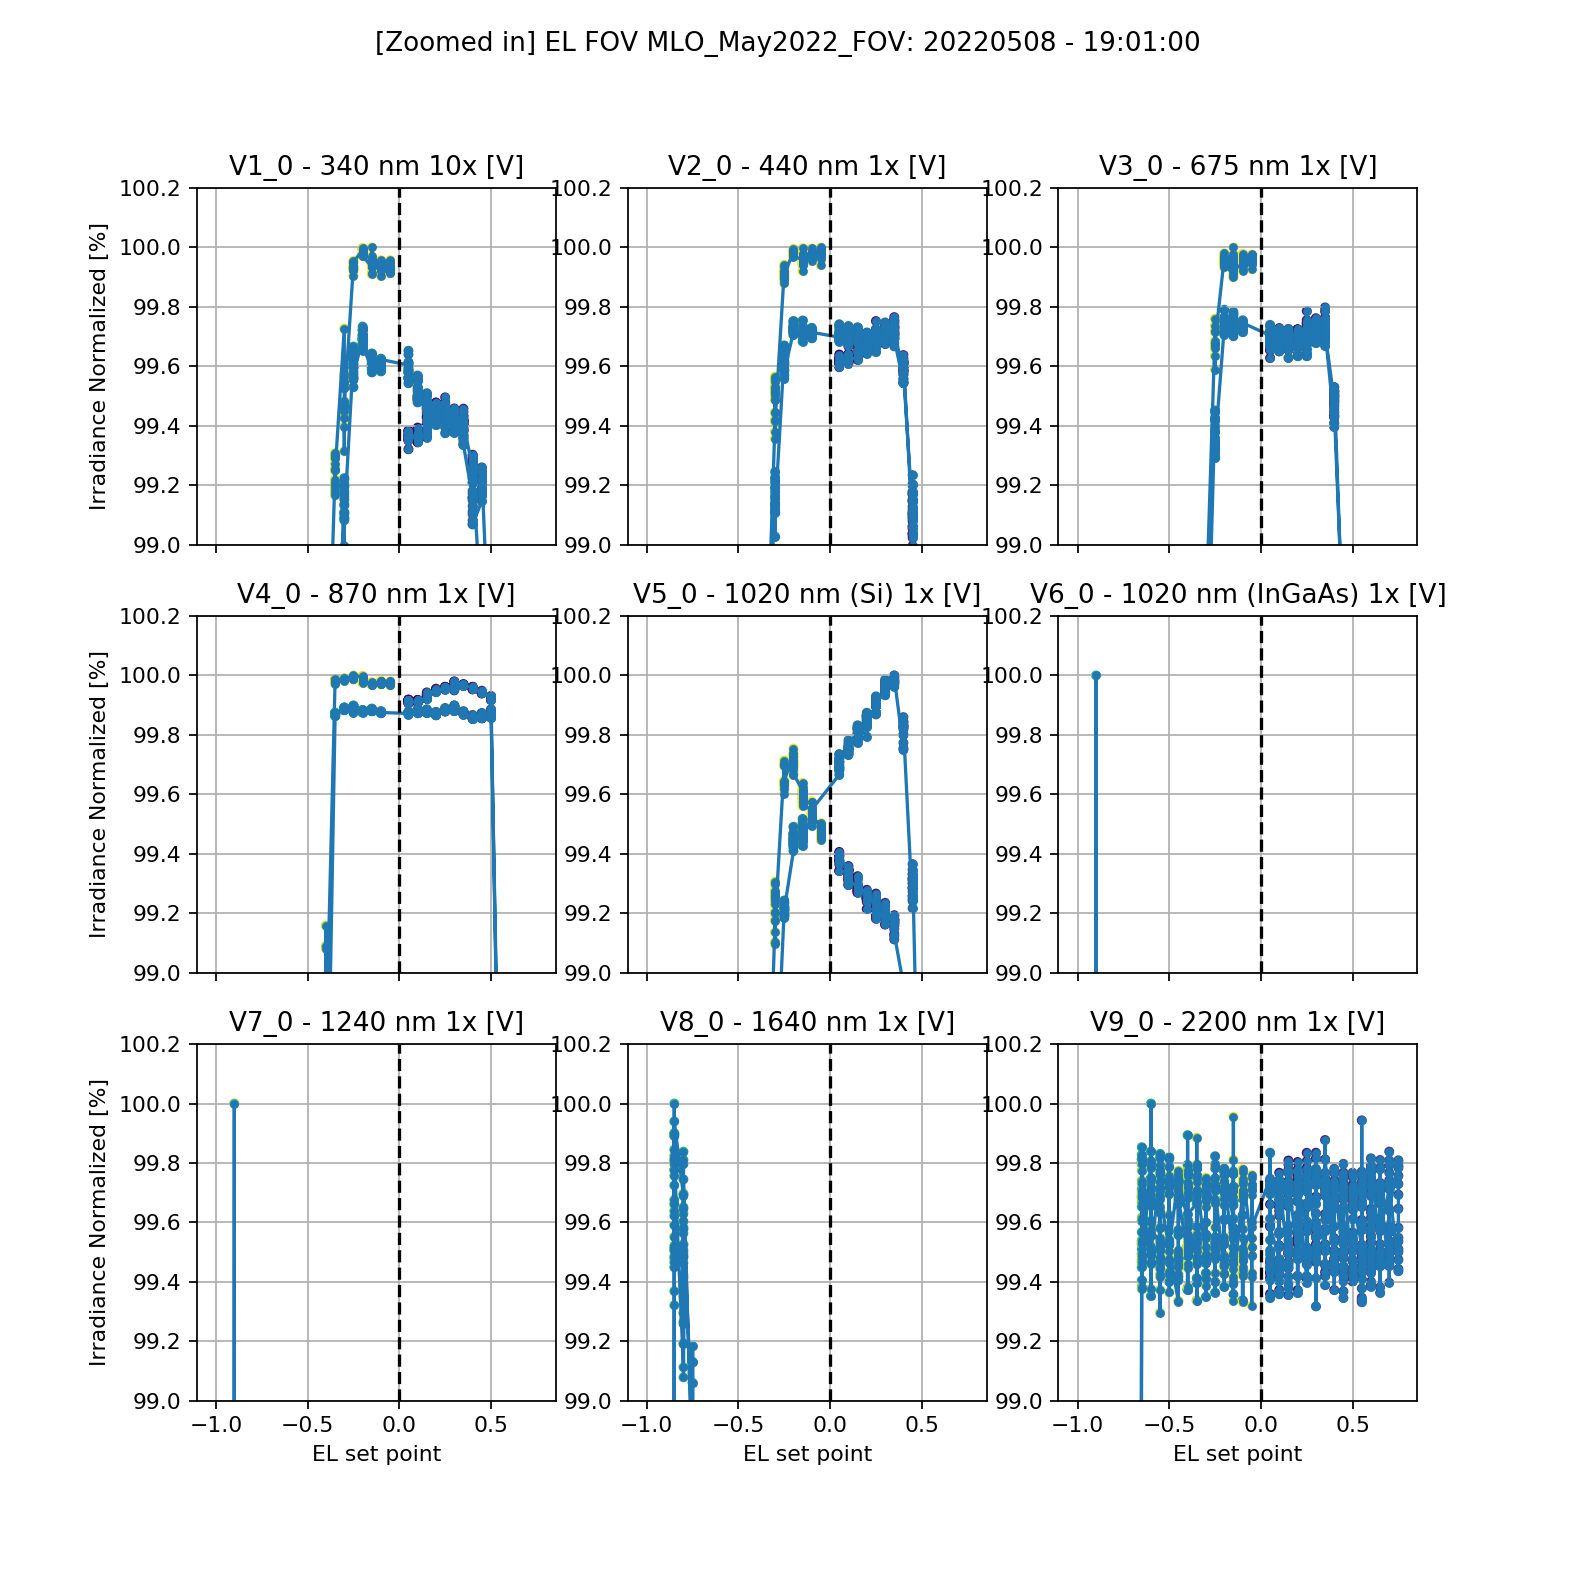

In [143]:
fig,ax = plt.subplots(3,3,sharex=True,figsize=(10,10))
ax = ax.flatten()
for ic,ch in enumerate(['V1_0','V2_0','V3_0','V4_0','V5_0','V6_0','V7_0','V8_0','V9_0']):
    ma = s[ch][ifov_good_el].max()
    ax[ic].plot(s['el_setpoint'][ifov_good_el],s[ch][ifov_good_el]/ma*100.0,'.-',label=ch)
    ax[ic].scatter(s['el_setpoint'][ifov_good_el],s[ch][ifov_good_el]/ma*100.0,50,s['UTC'][ifov_good_el],'.')
    ax[ic].axvline(0,ls='--',c='k')
    if ic>5: ax[ic].set_xlabel('EL set point')
    if not ic%3: ax[ic].set_ylabel('Irradiance Normalized [%]')
    ax[ic].set_title('{} - {}'.format(ch,s[ch].name))
    ax[ic].grid()
    ax[ic].set_ylim([99,100.2])
fig.suptitle('[Zoomed in] EL FOV {s.label}: {s.daystr} - {t[0]:%H:%M:%S}'.format(t=dt_fov,s=s))
fig.savefig(fp+'plots/{s.daystr}_{s.label}/{s.instname}_{s.daystr}_zoomed_EL_FOVT{t[0]:%H%M%S}.png'.format(s=s,t=dt_fov),
            dpi=600,transparent=True)

In [144]:
from aeronet import get_AERONET_file_v2

In [148]:
fp

u'/mnt/c/Users/lebla/Research/MLO/2022_May/'

In [151]:
get_AERONET_file_v2(date=datetime(2022,5,9,1,0,0),site='Mauna_Loa',version=3,path=fp)

u'/mnt/c/Users/lebla/Research/MLO/2022_May/220509_220509_Mauna_Loa.lev15'